# Disease Prediction based on Symtoms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# print(len(l1))

In [3]:
#List of Diseases is listed in list disease.

disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

#disease = [df['prognosis'].unique()]
print(len(disease))

41


In [4]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/Project/training_revamp.csv"

Mounted at /content/drive


In [5]:
df = pd.read_csv(DATA_PATH)
print(df.shape)

from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv(DATA_PATH)

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)

df.head(20)


# Count rows where 'disease' column has the value 'diabetes'
diabetes_count = df[df['prognosis'] == 'Diabetes'].shape[0]
print(diabetes_count)



(4961, 133)
0


<ipython-input-5-20bb6c774030>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,


In [6]:
print(df.head(10))

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0               

In [7]:
# Shuffle and split the data into training and temporary (validation + test)
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)

# Split the temporary data into validation and test
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print sizes of each DataFrame
print(f'Training set size: {len(train_data)}')
print(f'Validation set size: {len(val_data)}')
print(f'Test set size: {len(test_data)}')

print(train_data.head())

columns_except_prognosis = train_data.columns[train_data.columns != 'prognosis']
print(columns_except_prognosis)

Training set size: 2976
Validation set size: 992
Test set size: 993
      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
1896        0          0                     0                    0   
3873        0          0                     0                    0   
4819        0          0                     0                    0   
2960        0          0                     0                    0   
67          0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
1896          0       1           0             0        0                 0   
3873          0       0           1             0        0                 0   
4819          0       0           1             0        0                 0   
2960          0       0           0             0        0                 0   
67            0       0           0             0        0                 0   

      ...  blackheads  s

In [8]:
l1 = train_data.columns[train_data.columns != 'prognosis'].tolist()
print(len(l1))
print(l1)

132
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during

In [9]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)
print(len(l2))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
132


In [10]:
print(df.nunique)

<bound method DataFrame.nunique of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4956        0          0                     0                    0   
4957        0          1                     0                    0   
4958        0          0                     0                    0   
4959        0          1                     0                    0   
4960        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0         

In [11]:
import math

def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df1 if nunique[col] > 1 and nunique[col] < 50]]  # Correct df1 reference
    nRow, nCol = df1.shape
    columnNames = list(df1)

    # Corrected: Ensure nGraphRow is an integer
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)

    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()



In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def CorrelationMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include=[np.number])  # Keep only numerical columns

    # Remove columns that contain any missing values
    df1 = df1.dropna(axis='columns')

    # Keep columns where there are more than 1 unique values
    df1 = df1[[col for col in df1 if df1[col].nunique() > 1]]

    columnNames = list(df1)
    if len(columnNames) > 10:  # Reduce the number of columns if too many
        columnNames = columnNames[:10]

    df1 = df1[columnNames]

    # Create the scatter matrix without KDE
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='hist')

    # Calculate correlations
    corrs = df1.corr().values

    # Annotate correlations
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr = {corrs[i, j]:.3f}', (0.5, 0.5), xycoords='axes fraction', ha='center', va='center', size=textSize)

    plt.suptitle('Scatter and Histogram Plot', fontsize=textSize + 5)
    plt.tight_layout()
    plt.show()


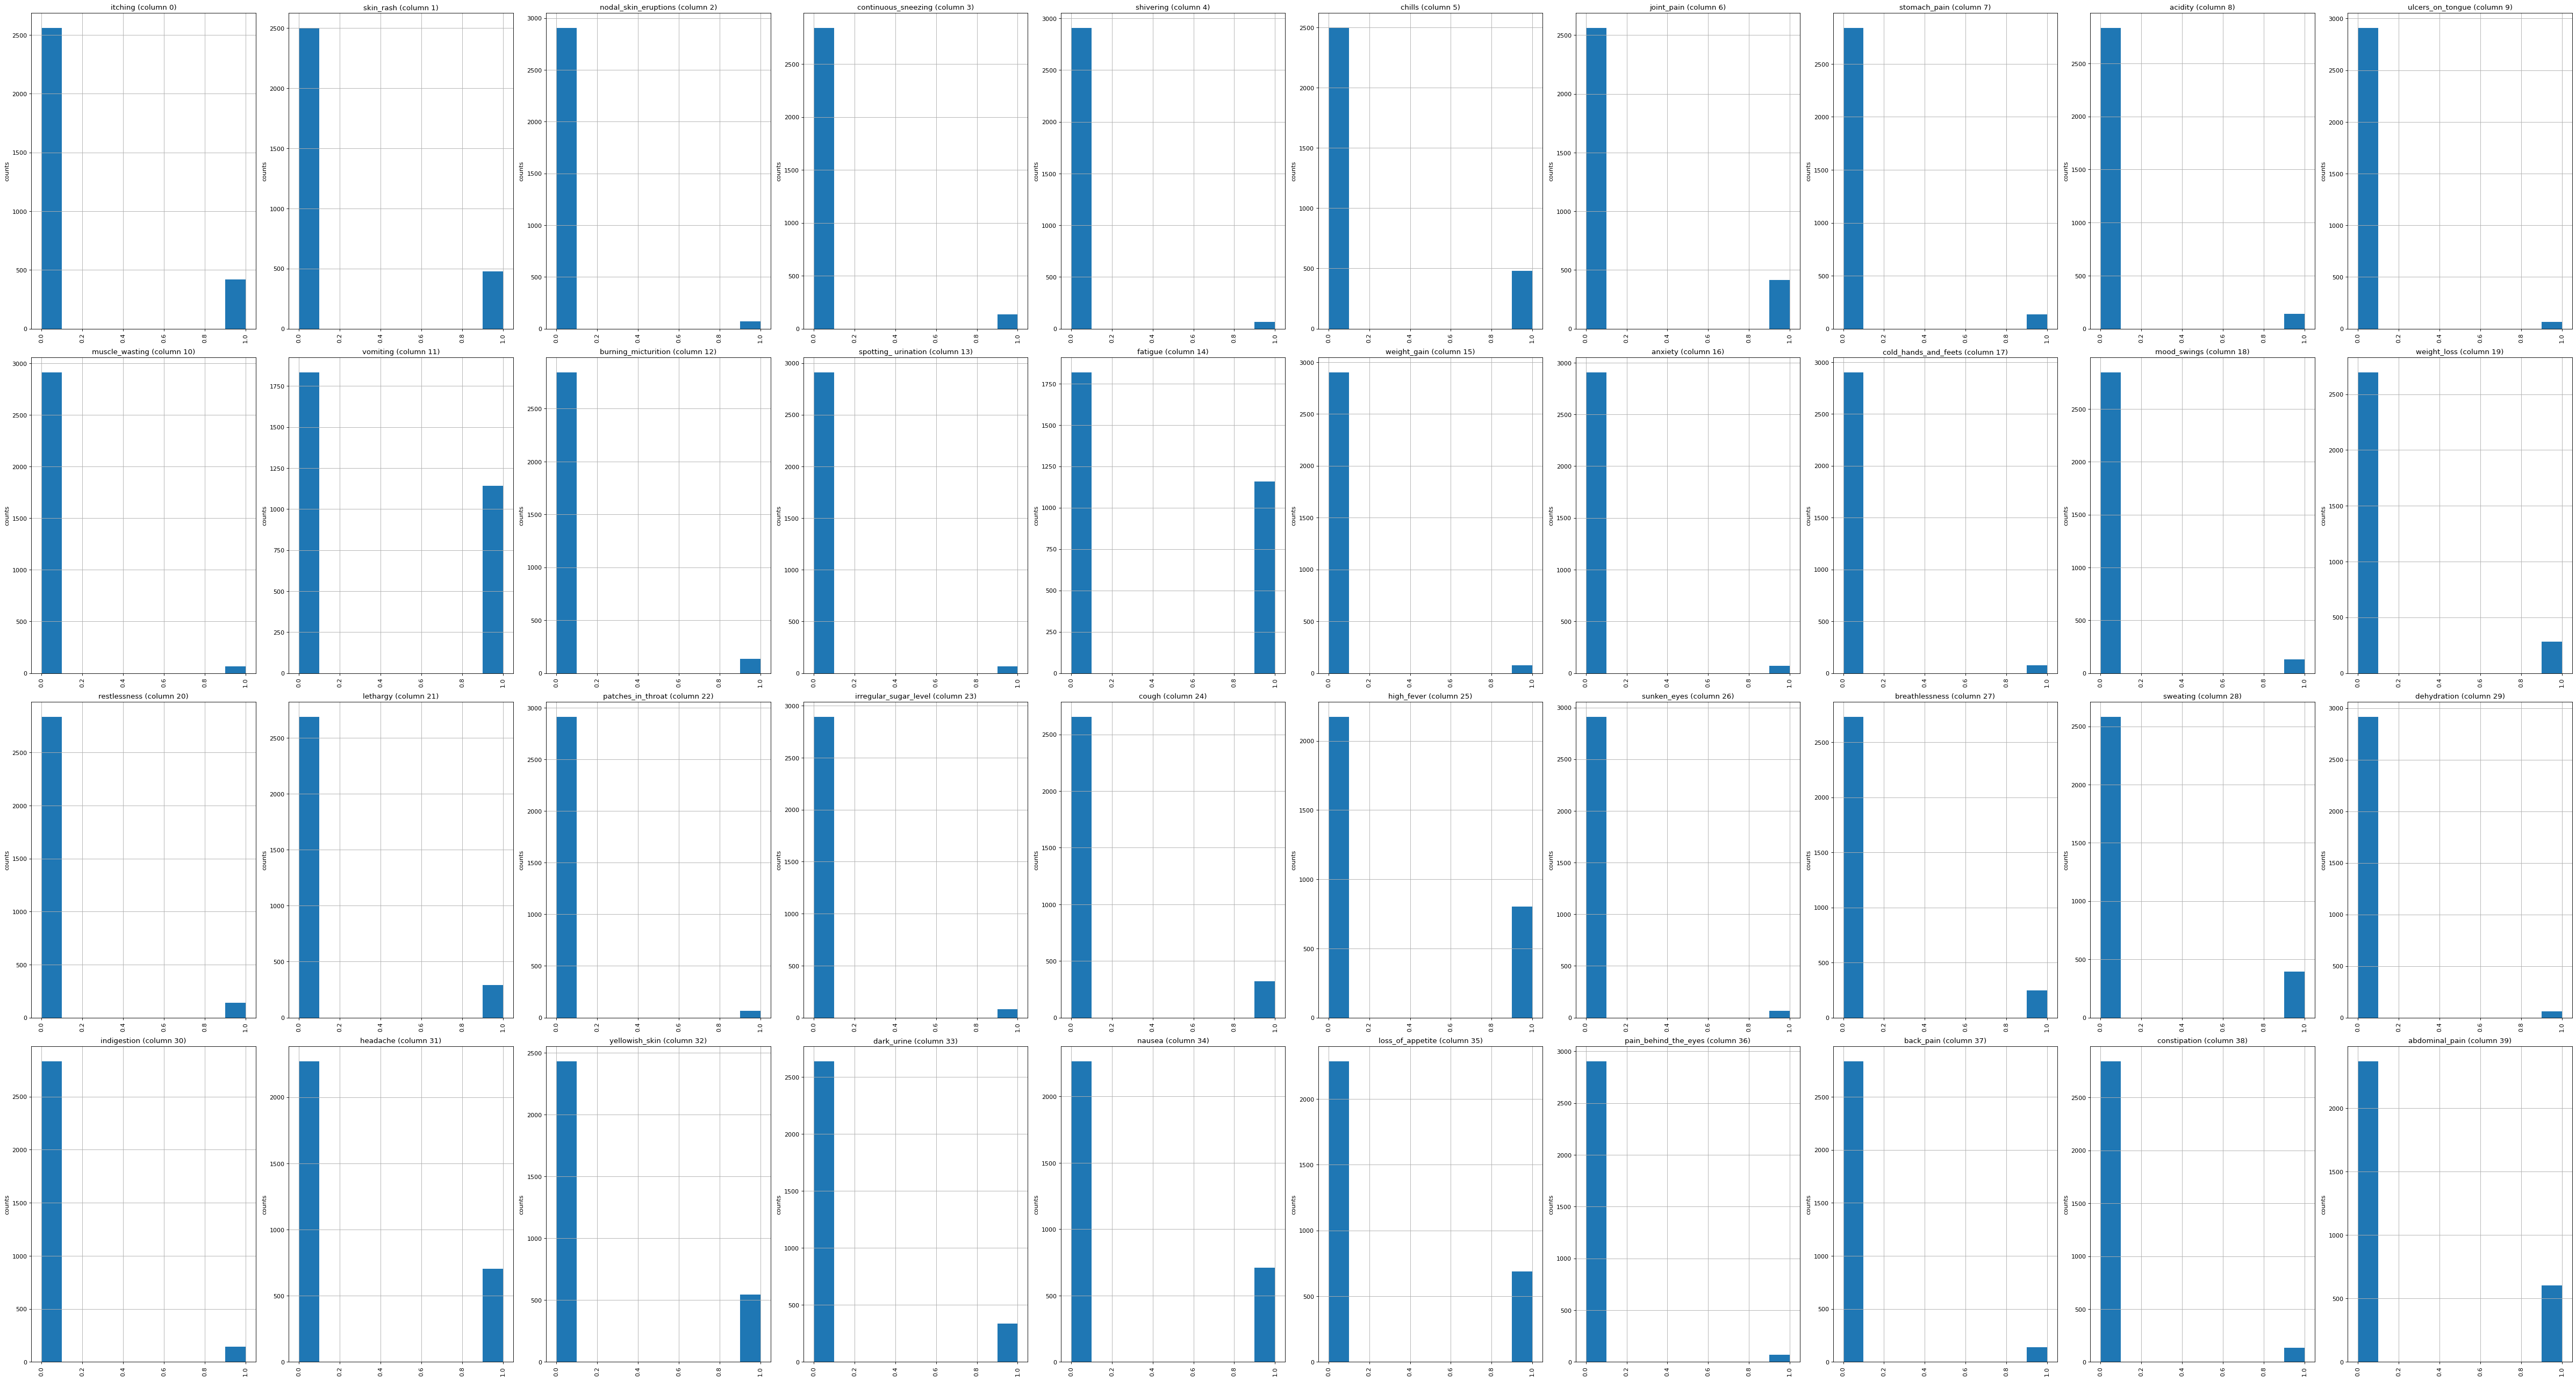

In [13]:
plotPerColumnDistribution(train_data, 40, 10)

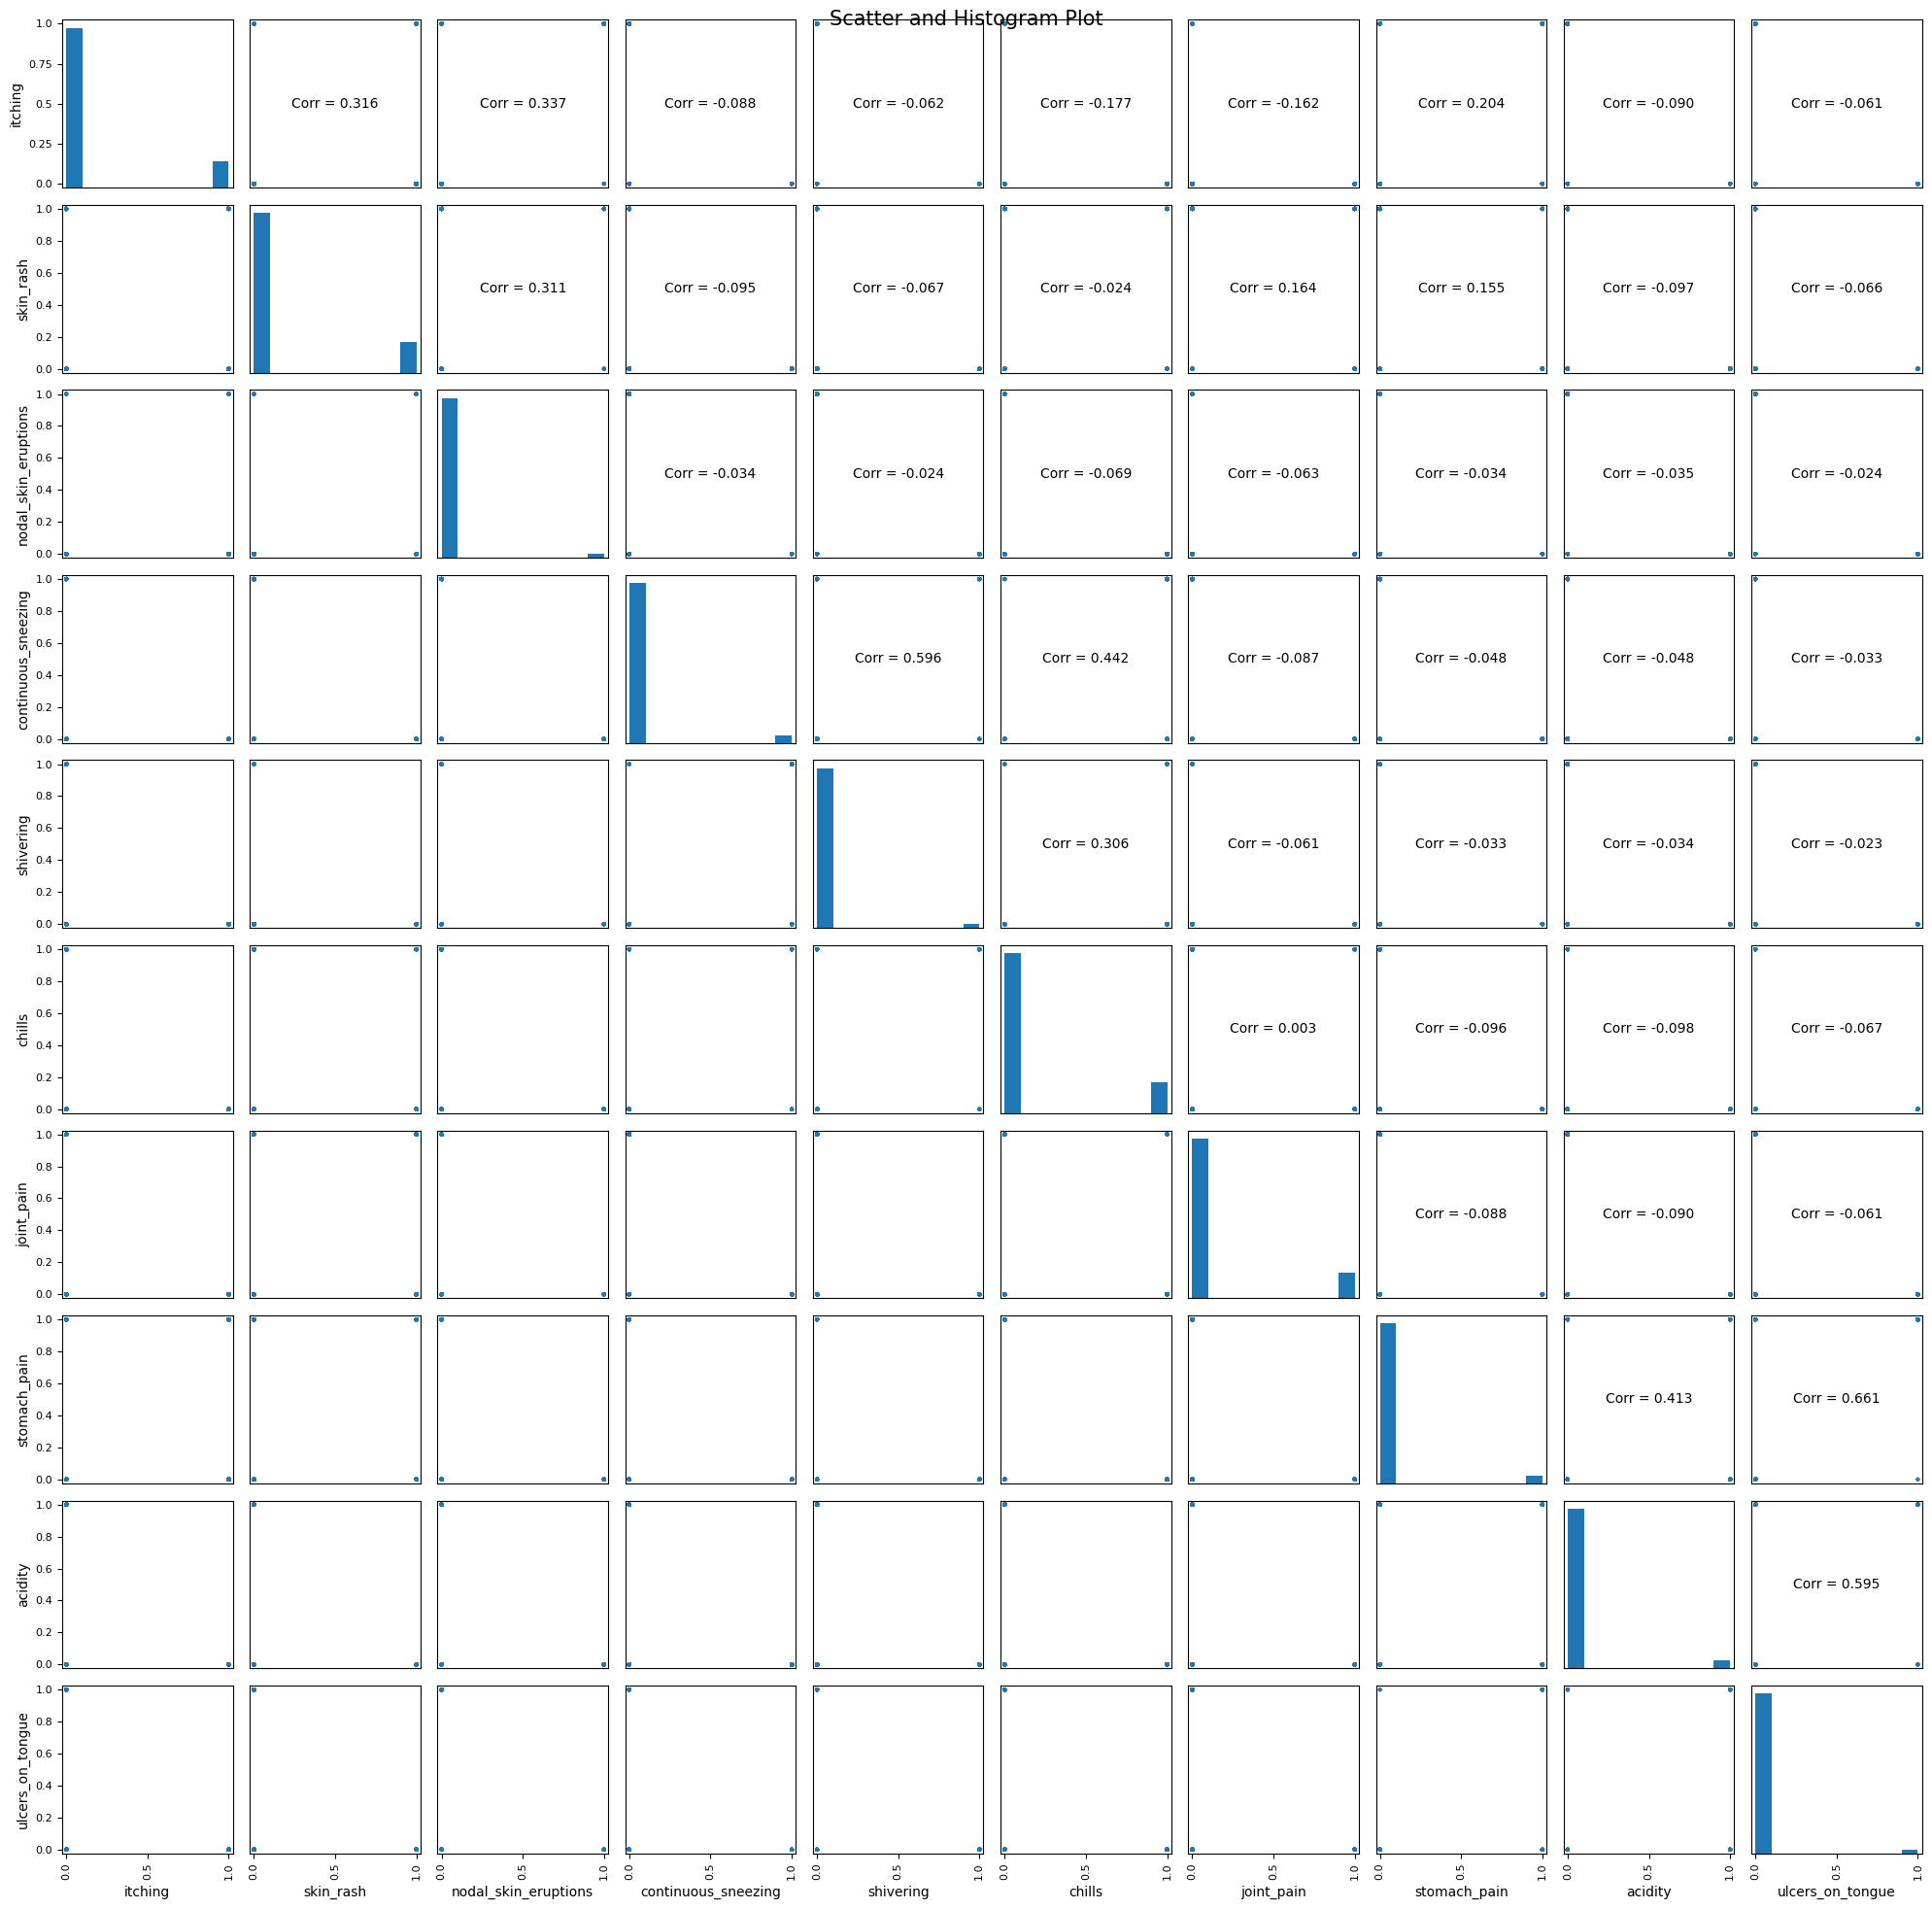

In [35]:
CorrelationMatrix(train_data, 20, 10)

In [15]:
X_syms= train_data[l1]  ##feature set
y_dis = train_data[["prognosis"]]

np.ravel(y_dis)

print(y_dis)


      prognosis
1896         25
3873         19
4819         22
2960          8
67            6
...         ...
4426         39
466           5
3092         17
3772          0
860           4

[2976 rows x 1 columns]


In [16]:
# print(y_dis.head(20))
# print(y_dis.shape)
print(y_dis)

      prognosis
1896         25
3873         19
4819         22
2960          8
67            6
...         ...
4426         39
466           5
3092         17
3772          0
860           4

[2976 rows x 1 columns]


In [17]:
#testing data
DATA_PATH2 = "/content/drive/MyDrive/Project/synthetic_30.csv"

tr = pd.read_csv(DATA_PATH2)

#Using inbuilt function replace in pandas for replacing the values

tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
tr.head()

<ipython-input-17-625fa4699e78>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


In [18]:
print(len(tr["prognosis"].unique()))
print(tr.shape)

41
(993, 133)


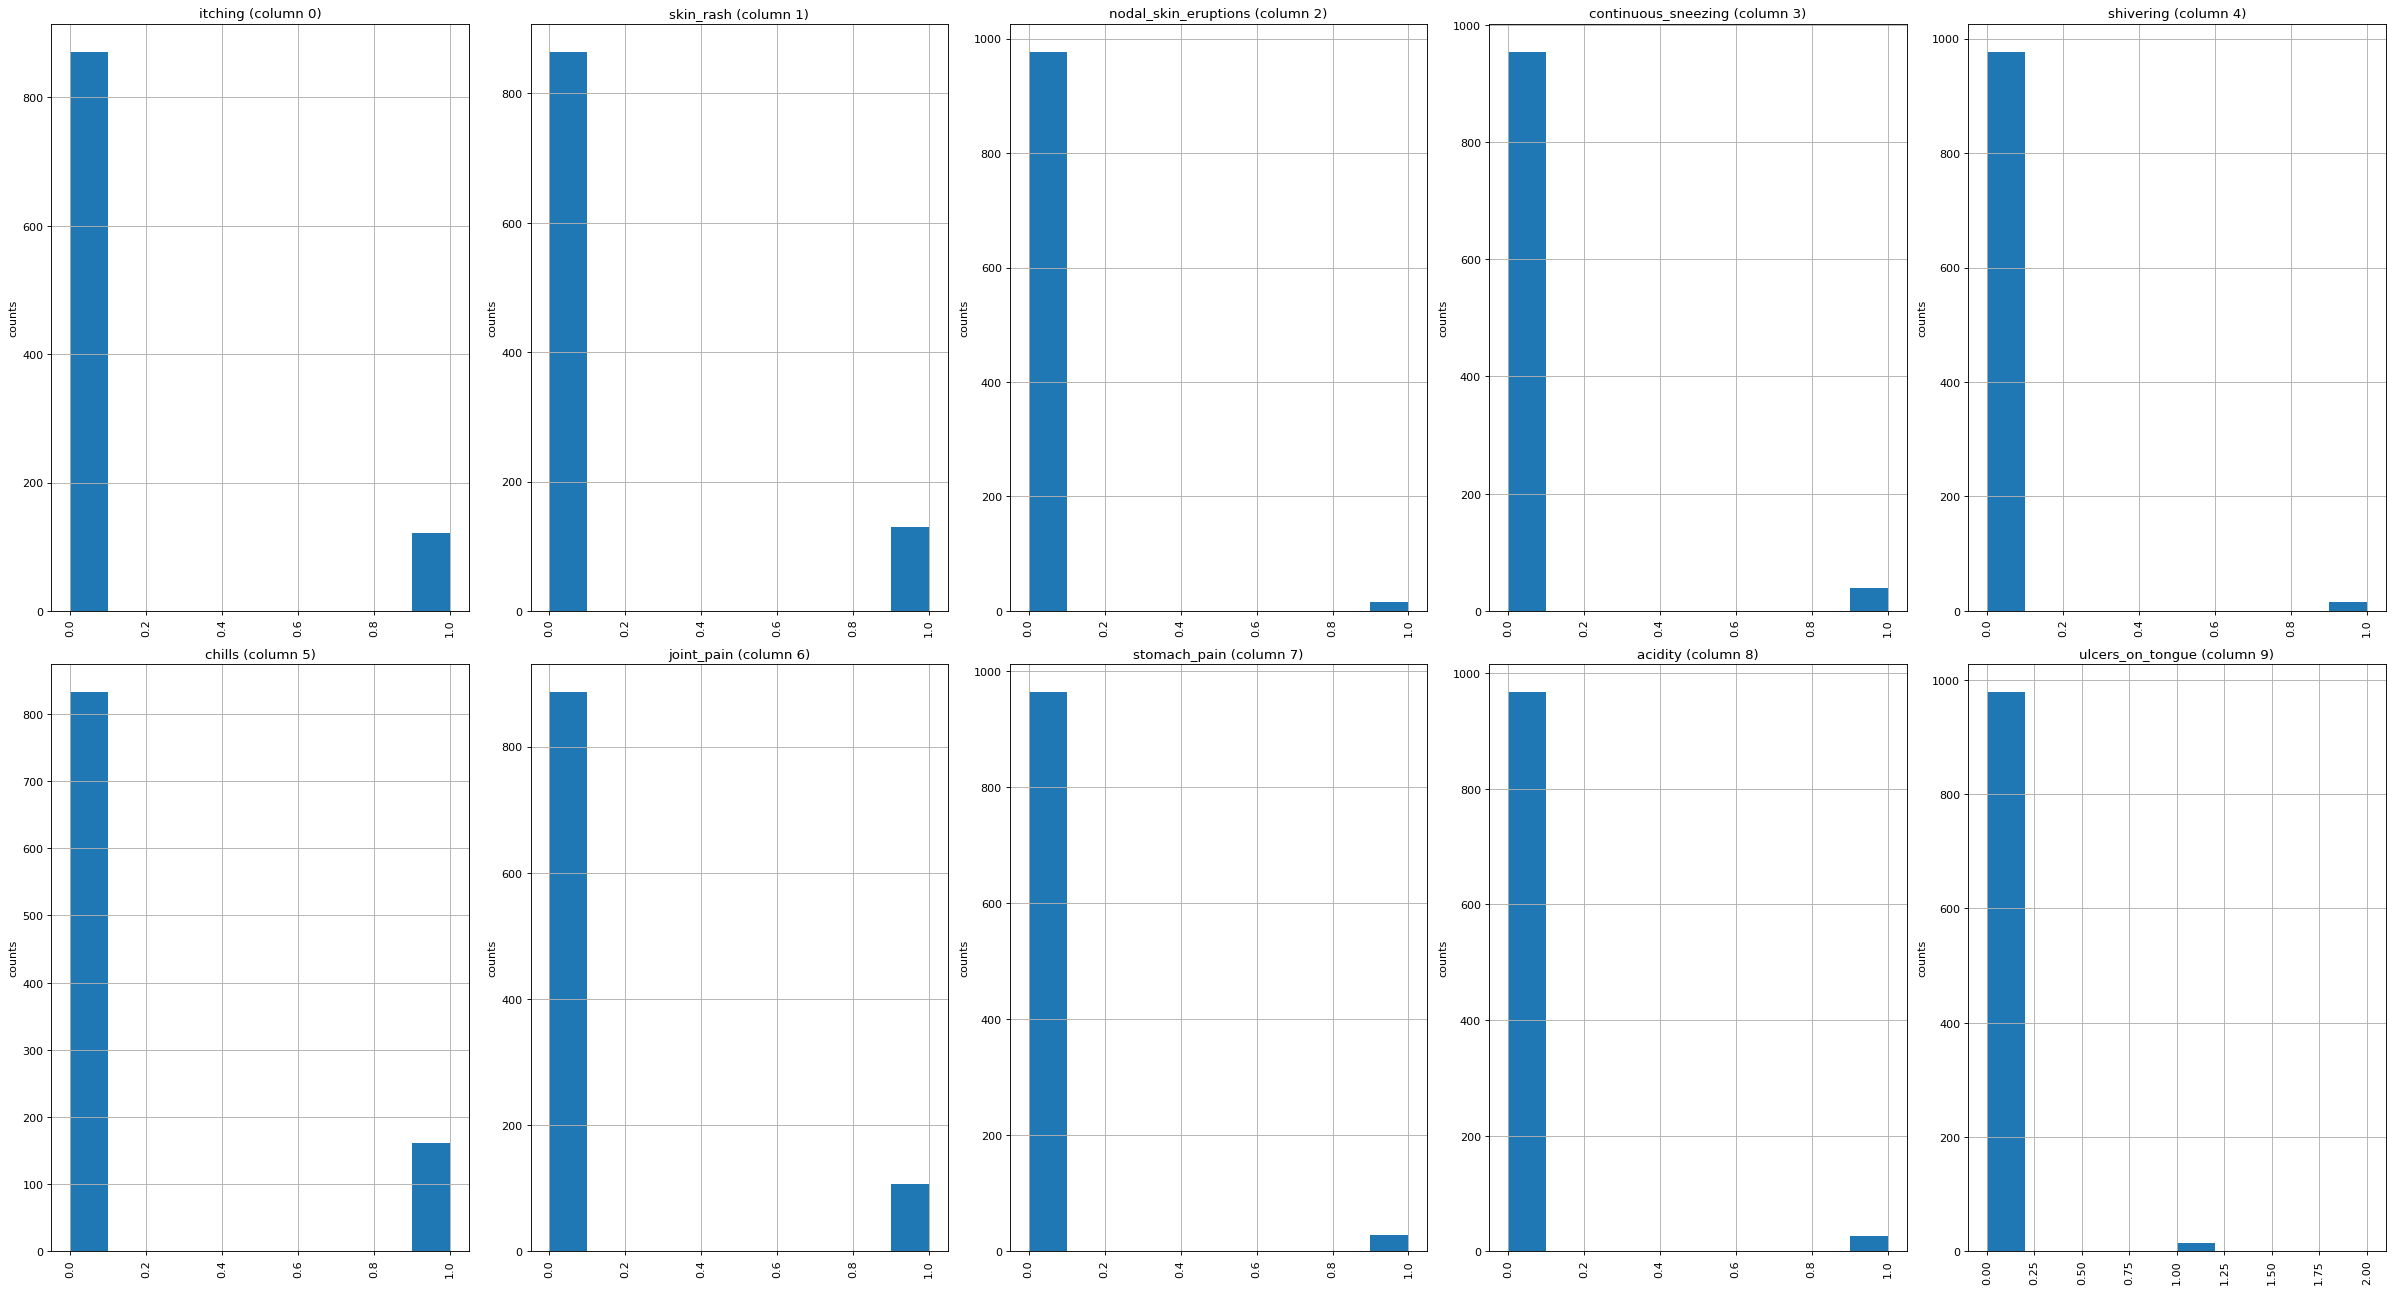

In [19]:
plotPerColumnDistribution(tr, 10, 5)

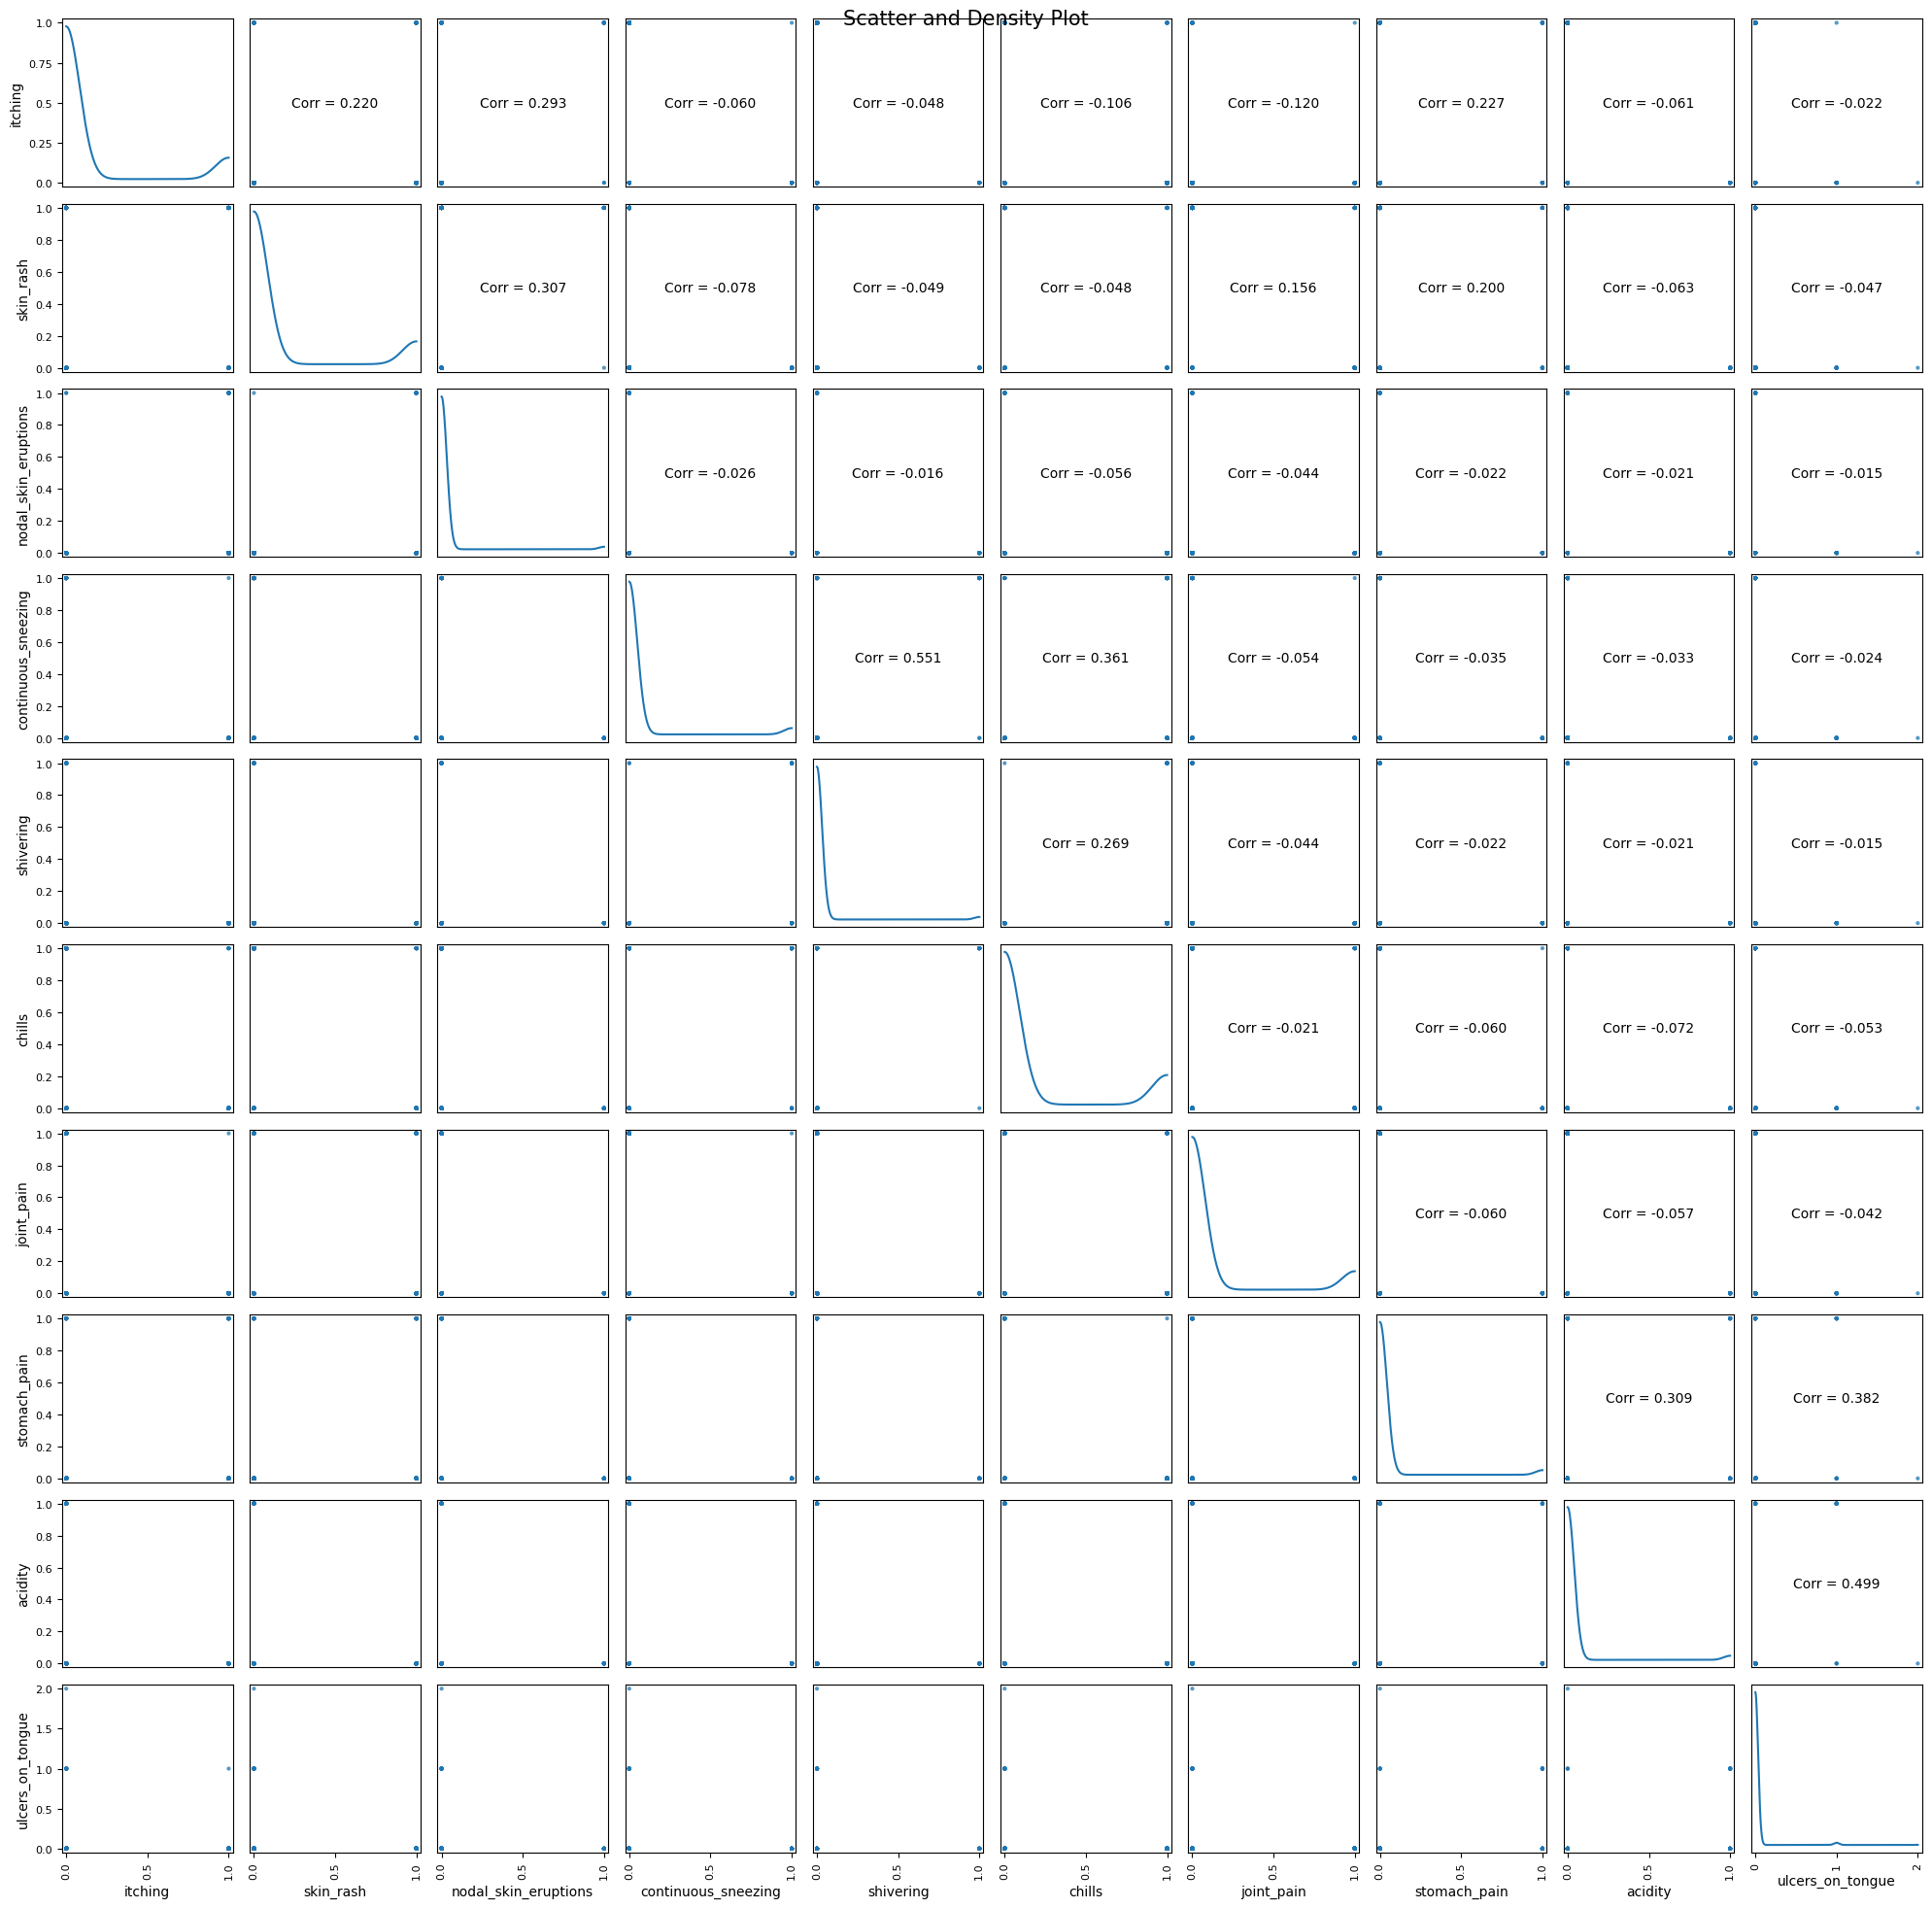

In [20]:
CorrelationMatrix(tr, 20, 10)

In [21]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

     itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0          0          0                     0                    0          0   
1          0          0                     0                    0          0   
2          0          0                     0                    0          0   
3          0          0                     0                    0          1   
4          0          0                     0                    0          0   
..       ...        ...                   ...                  ...        ...   
988        0          0                     0                    0          0   
989        0          0                     0                    0          0   
990        0          0                     0                    0          0   
991        0          0                     0                    0          0   
992        0          0                     0                    0          0   

     chills  joint_pain  st

In [22]:
print(y_test.shape)

(993, 1)


In [23]:
print(y_test)

     prognosis
0           28
1           18
2           21
3            1
4           26
..         ...
988         14
989         12
990         24
991          4
992         14

[993 rows x 1 columns]


# Decision Tree Algorithm

In [33]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import ipywidgets as widgets
from IPython.display import display

clf = tree.DecisionTreeClassifier(max_depth=35,splitter= 'random')
clf.fit(X_syms, y_dis)

# Predict on test data
y_pred = clf.predict(X_test)
print("\nDecision Tree Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))







Decision Tree Model Results:
Accuracy: 0.6727089627391742
Confusion matrix: [[15  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 10 ...  1  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 1  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 17]]


In [25]:
# vr = val_data

DATA_PATH3 = "/content/drive/MyDrive/Project/syn_val_20.csv"

vr = pd.read_csv(DATA_PATH3)

#Using inbuilt function replace in pandas for replacing the values

vr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
vr.head()


X_val= vr[l1]
y_val = vr[["prognosis"]]
np.ravel(y_val)
print(X_val)
print(y_val)

     itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0          1          0                     0                    0          0   
1          0          0                     0                    0          0   
2          1          0                     0                    0          0   
3          0          0                     0                    1          0   
4          0          1                     0                    0          0   
..       ...        ...                   ...                  ...        ...   
987        0          0                     0                    0          0   
988        0          0                     0                    0          0   
989        0          0                     0                    0          0   
990        0          0                     0                    0          0   
991        1          0                     0                    0          0   

     chills  joint_pain  st

<ipython-input-25-faf1e97416ba>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,



Decision Tree Model Results:
Accuracy: 0.77
Confusion Matrix:
 [[13  0  0 ...  1  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 18]]


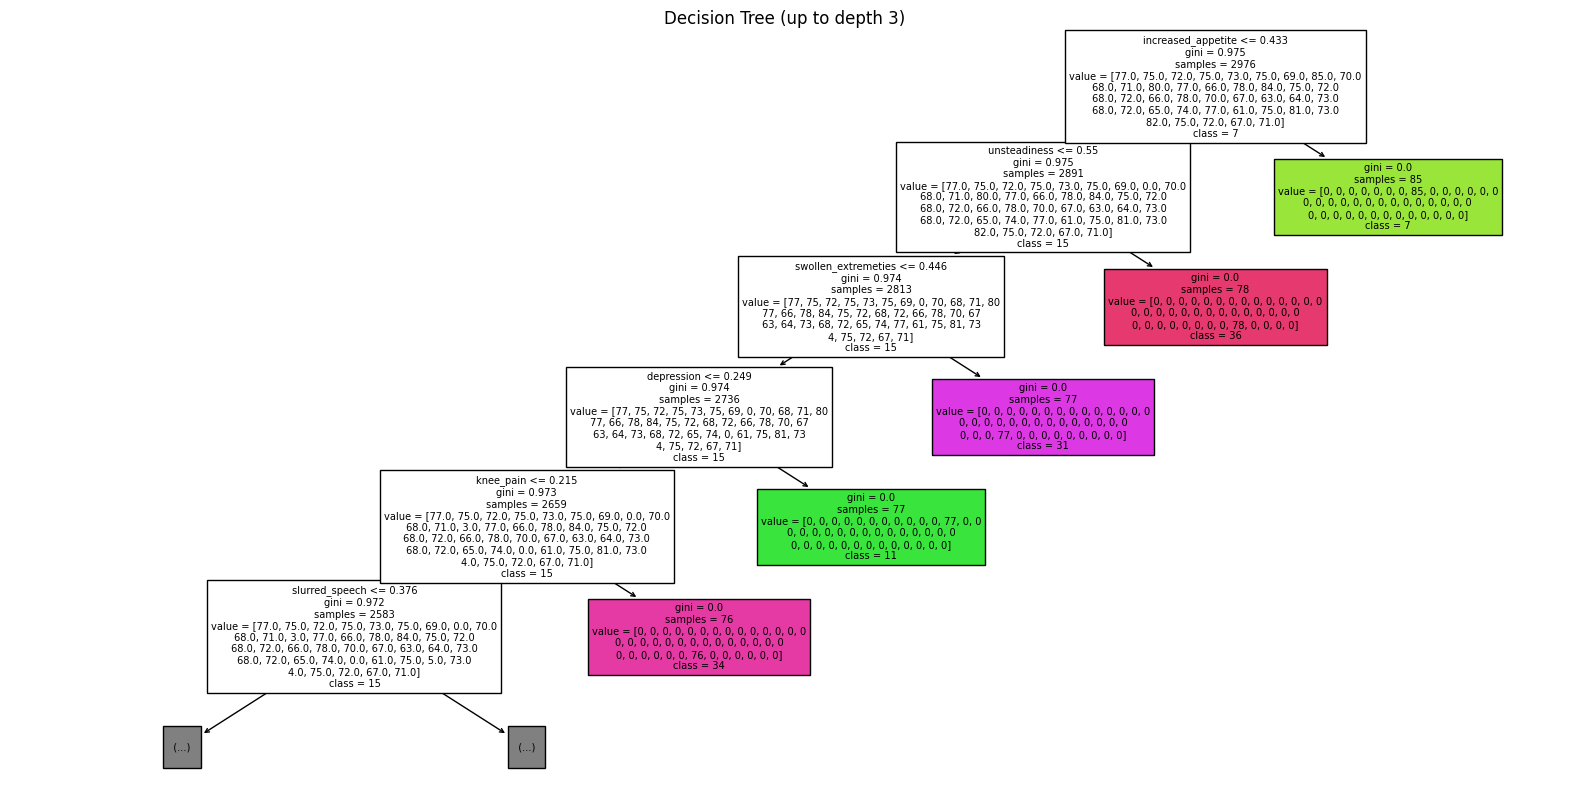

In [39]:
# from sklearn import tree
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Instantiate the Decision Tree model
# clf3 = tree.DecisionTreeClassifier(max_depth=35, splitter='random')


# clf3.fit(X_syms, y_dis)

# # Predict on validation data
# y_pred = clf3.predict(X_val)

# # Print results
# print("\nDecision Tree Model Results:")
# print("Accuracy:", accuracy_score(y_val, y_pred))
# print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Instantiate the Decision Tree model with specified parameters
clf3 = DecisionTreeClassifier(max_depth=35, splitter='random', random_state=42)

# Fit the model on the training data
clf3.fit(X_syms, y_dis)

# Predict on validation data
y_pred = clf3.predict(X_val)

# Print results with explicit conversions to avoid TypeErrors
print("\nDecision Tree Model Results:")
print("Accuracy:", str(round(accuracy_score(y_val, y_pred), 2)))  # Explicitly convert to string
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the Decision Tree up to a limited depth for readability
plt.figure(figsize=(20, 10))
plot_tree(clf3, max_depth=5, filled=True, feature_names=X_syms.columns, class_names=[str(cls) for cls in clf3.classes_])
plt.title("Decision Tree (up to depth 3)")
plt.show()


In [ ]:



# Example data, replace X, y, X_test, y_test, and disease with actual data
# Assuming X, y, X_test, y_test, and disease lists/arrays are already available
# l1 = ["itching", "skin_rash", "nodal_skin_eruptions", "continuous_sneezing", "shivering"]
# l2 = [0] * len(l1)

# Widgets for inputs
symptom1 = widgets.Dropdown(options=["Select Here"] + l1, description="Symptom 1:")
symptom2 = widgets.Dropdown(options=["Select Here"] + l1, description="Symptom 2:")
symptom3 = widgets.Dropdown(options=["Select Here"] + l1, description="Symptom 3:")
symptom4 = widgets.Dropdown(options=["Select Here"] + l1, description="Symptom 4:")
symptom5 = widgets.Dropdown(options=["Select Here"] + l1, description="Symptom 5:")
button = widgets.Button(description="Predict")

display(symptom1, symptom2, symptom3, symptom4, symptom5, button)

def DecisionTree(btn):
    # Check if at least two symptoms are provided
    if symptom1.value == "Select Here" or symptom2.value == "Select Here":
        print("Please provide at least two symptoms.")
        return

    # Fit a decision tree model (replace with actual fitting data)
    clf3 = tree.DecisionTreeClassifier()
    clf3 = clf3.fit(X_syms, y_dis)

    # Predict on test data
    y_pred = clf3.predict(X_test)
    print("\nDecision Tree Model Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion matrix:", confusion_matrix(y_test, y_pred))

    # Get the selected symptoms and convert them to a binary format for the classifier
    psymptoms = [symptom1.value, symptom2.value, symptom3.value, symptom4.value, symptom5.value]

    for k in range(len(l1)):
        for z in psymptoms:
            if z == l1[k]:
                l2[k] = 1

    inputtest = [l2]
    predict = clf3.predict(inputtest)
    predicted = predict[0]

    # Find the predicted disease
    h = 'no'
    for a in range(len(disease)):
        if predicted == a:
            h = 'yes'
            break

    if h == 'yes':
        print(f"Predicted Disease: {disease[a]}")
        # scatterinp(symptom1.value, symptom2.value, symptom3.value, symptom4.value, symptom5.value)
        # scatterplt(disease[a])
    else:
        print("Disease not found.")

button.on_click(DecisionTree)
